In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rcParams, rc

In [6]:


# set rcParams ~~~~~~~~~~~~~~~~~~~~~~~~
rcParams['axes.linewidth'] =    2

rcParams['xtick.major.size'] =  10
rcParams['xtick.major.width'] = 3
rcParams['xtick.minor.size'] =  5
rcParams['xtick.minor.width'] = 3

rcParams['ytick.major.size'] =  10
rcParams['ytick.major.width'] = 3
rcParams['ytick.minor.size'] =  5
rcParams['ytick.minor.width'] = 2
font = {'size' : 16, 'weight' : 'bold'}
rc('font', **font)


#davos, devon, lapaz, oslo
cm_name = 'devon'
cm_file = np.loadtxt(f'/home/imalsky/ScientificColourMaps7/{cm_name}/{cm_name}.txt')
cm_file = np.flip(cm_file, axis=0)
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file)


In [7]:
df1 = pd.read_csv('/media/imalsky/Samsung_T5/Hot-Jup-Data/UPS-PLANETS/OG-GCM-OUTPUT/UPS-BIG-G-CLEAR.txt',
                 delim_whitespace=True, skiprows=5,
                 names=('lat', 'lon', 'level',
                        'alt', 'pres', 'temp', 
                        'u', 'v', 'w',
                        'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1'))

df1 = df1[["lat", "level", "pres", "u"]]
df1 = df1.groupby(['lat', 'level']).mean().reset_index()
df1 = df1[["lat", "pres","u"]]

u_data_1 = df1.u.values.reshape(48, 50)







df2 = pd.read_csv('/media/imalsky/Samsung_T5/Hot-Jup-Data/UPS-PLANETS/OG-GCM-OUTPUT/UPS-LOW-G-CLEAR.txt',
                 delim_whitespace=True, skiprows=5,
                 names=('lat', 'lon', 'level',
                        'alt', 'pres', 'temp',
                        'u', 'v', 'w',
                        'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1'))

df2 = df2[["lat", "level", "pres", "u"]]
df2 = df2.groupby(['lat', 'level']).mean().reset_index()
df2 = df2[["lat", "pres","u"]]

u_data_2 = df2.u.values.reshape(48, 50)






df4 = pd.read_csv('/media/imalsky/Samsung_T5/Hot-Jup-Data/UPS-PLANETS/OG-GCM-OUTPUT/UPS-LOW-G-COM-CLOUDY.txt',
                 delim_whitespace=True, skiprows=5,
                 names=('lat', 'lon', 'level',
                        'alt', 'pres', 'temp',
                        'u', 'v', 'w',
                        'aero_sw_tau_1', 'sw_asym_1', 'sw_pi0_1',
                        'aero_sw_tau_2', 'sw_asym_2', 'sw_pi0_2',
                        'aero_sw_tau_3', 'sw_asym_3', 'sw_pi0_3',
                        'aero_sw_tau_4', 'sw_asym_4', 'sw_pi0_4'))

df4 = df4[["lat", "level", "pres", "u"]]
df4 = df4.groupby(['lat', 'level']).mean().reset_index()
df4 = df4[["lat", "pres","u"]]

u_data_4 = df4.u.values.reshape(48, 50)






print (u_data_1)
print ()
print (u_data_4)



lats = np.linspace(-90, 90, 48)
pressures = np.logspace(-4, 2, 50)


[[ 370.91178125   52.8455625   176.91502083 ...  -19.21798229
   -30.80090608  -31.73465177]
 [ 831.70253125  388.50309375  546.17519792 ...  -44.8871199
   -68.74295833  -71.50967708]
 [1258.19404167  957.23409375 1075.65912833 ...  -72.07869792
  -103.39647917 -108.83921875]
 ...
 [1110.39241667  833.20591667 1062.70226042 ...  -77.24140625
   -93.62847917 -105.7015    ]
 [ 557.41510417  370.7476875   404.39053125 ...  -49.07704947
   -61.34066667  -69.57959375]
 [ 166.89557292  117.57820833   30.50158333 ...  -21.29190281
   -27.25841583  -30.94612113]]

[[ -29.46557292   18.12040625  -21.46762292 ...  -42.65360417
   -42.76234375  -42.98592708]
 [ -55.31297917  -83.49545833  -55.10592708 ...  -97.60061458
   -97.92033333  -98.5238125 ]
 [ -77.30253125 -152.67178125  -60.66253125 ... -152.07114583
  -152.834375   -153.94572917]
 ...
 [ -80.78634375  -99.30290625  -83.23257292 ... -153.25145833
  -153.9175     -152.52447917]
 [ -61.34915625  -52.81681562  -48.20939583 ...  -98.560218

-481.0536458333335 6527.6010416666695


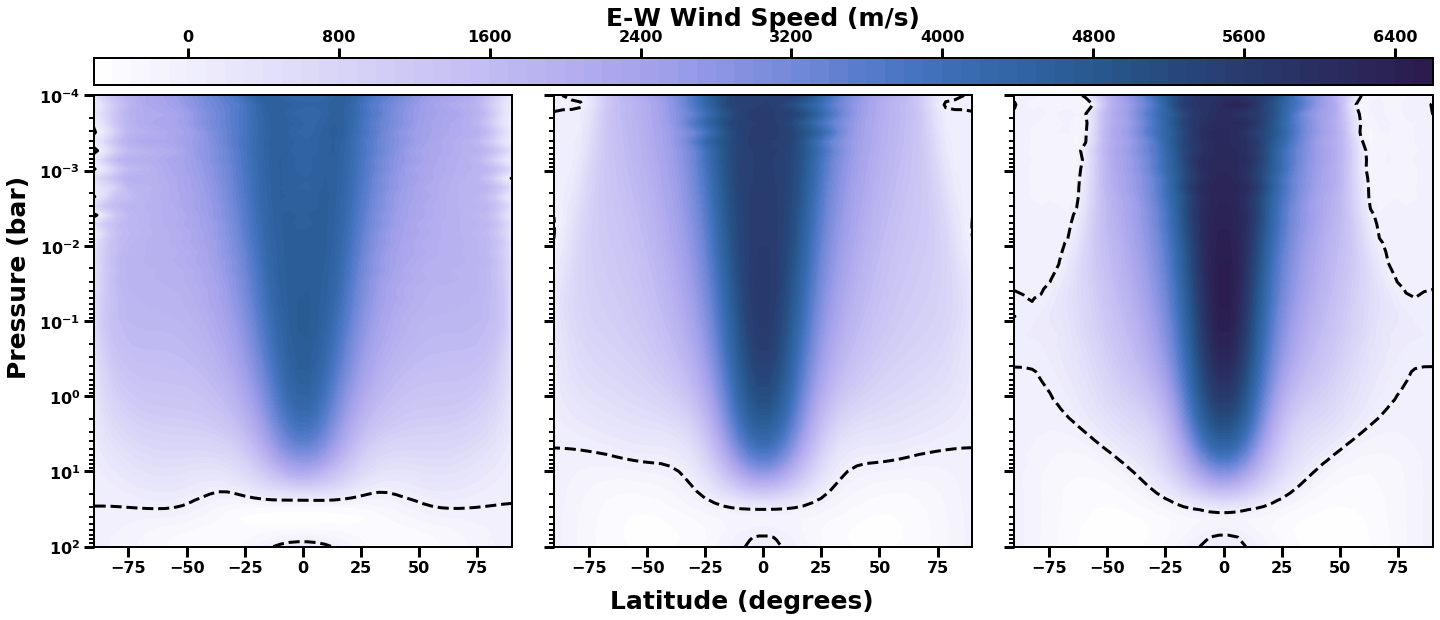

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

wind_max = 6650
wind_min = -500


mp = axes[0].contourf(lats, pressures, u_data_1.T,  cmap=my_colors, levels=np.arange(wind_min, wind_max, 100))
cb = axes[0].contour(lats, pressures, u_data_1.T,
                  levels=[0],
                  colors='black', linewidths=3, linestyles='dashed')

axes[0].set_yscale("log")
axes[0].set_ylim(1e2, 1e-4)




mp = axes[1].contourf(lats, pressures, u_data_2.T,  cmap=my_colors, levels=np.arange(wind_min, wind_max, 100))
cb = axes[1].contour(lats, pressures, u_data_2.T,
                  levels=[0],
                  colors='black', linewidths=3, linestyles='dashed')

axes[1].set_yscale("log")
axes[1].set_ylim(1e2, 1e-4)




#mp = axes[1,0].contourf(lats, pressures, u_data_3.T,  cmap=my_colors, levels=np.arange(wind_min, wind_max, 100))
#cb = axes[1,0].contour(lats, pressures, u_data_3.T,
#                  levels=[0],
#                  colors='black', linewidths=3, linestyles='dashed')
#axes[1,0].set_yscale("log")
#axes[1,0].set_ylim(1e2, 1e-4)



print (np.amin(u_data_4.T), np.amax(u_data_4.T))
mp = axes[2].contourf(lats, pressures, u_data_4.T,  cmap=my_colors, levels=np.arange(wind_min, wind_max, 100))
cb = axes[2].contour(lats, pressures, u_data_4.T,
                  levels=[0],
                  colors='black', linewidths=3, linestyles='dashed')

axes[2].set_yscale("log")
axes[2].set_ylim(1e2, 1e-4)



temp_cbar = fig.colorbar(mp, ax=axes.ravel().tolist(), location='top', aspect=50, pad=0.02)
temp_cbar.set_label('E-W Wind Speed (m/s)', size=25, weight='bold')

fig.text(0.5, 0.04, r"Latitude (degrees)", size=25, weight='bold', ha='center')
fig.text(0.075, 0.5, r"Pressure (bar)", size=25, weight='bold', va='center', rotation='vertical')

plt.savefig('/home/imalsky/Desktop/winds.png', bbox_inches='tight', dpi=500)